In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso 
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

In [105]:
diabetes=load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [106]:
df=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

In [107]:
df['target']=diabetes.target

In [108]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [109]:
x = df.drop(columns=['target'])
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [110]:
y= df['target']

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

In [112]:
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [113]:
ridge_model=Ridge()
lasso_model=Lasso()

In [114]:
ridge_model.fit(x_train_scaled,y_train)

Ridge()

In [115]:
lasso_model.fit(x_train_scaled,y_train)

Lasso()

In [116]:
ridge_model.predict(x_test_scaled)

array([181.92511315, 182.08784828,  86.34803975,  86.96529682,
       154.27013608, 210.40168496, 247.59902164, 150.52842219,
       103.72832643, 203.92590717, 209.46086357, 194.61492565,
       175.54002159, 253.58494296, 142.50496102, 115.91349428,
        62.98135673, 188.54879274, 196.23998439,  39.28456339,
       210.1408061 , 231.7845621 ,  95.14227422, 123.97101861,
       122.16345255, 151.17828619,  72.69544244, 164.09292934,
       202.74248746, 113.66627661,  73.54300869, 190.2345437 ,
       125.76831607, 223.69907102, 116.92085957, 124.62159764,
        61.3009949 , 222.3599174 , 102.06359252, 223.43088647,
       108.70735337, 161.94603622, 100.56297933, 107.98662658,
       119.81130407, 190.5203101 , 228.59158624, 160.0589273 ,
       190.063612  ,  45.38514722, 202.20555454, 143.17353875,
       224.94639144, 194.09614314, 167.43370755, 145.71759993,
       161.62985267, 125.47499132, 194.90250382, 138.31803877,
       120.52698945,  76.38914899, 130.80343214, 147.56

In [117]:
lasso_model.predict(x_test_scaled)

array([190.71466917, 179.15798757,  94.56685034,  88.54740894,
       154.01064087, 210.60241229, 241.08728151, 151.99879941,
       101.65049558, 193.66849775, 208.49248534, 207.6553511 ,
       174.42465   , 248.49808659, 145.24465084, 110.93556209,
        64.4629658 , 190.61374792, 193.87416519,  46.28909651,
       207.57737721, 223.69484187,  93.72421886, 128.01566024,
       119.69254175, 157.0681026 ,  74.89961141, 160.67723702,
       196.27300054, 111.46665784,  81.67728994, 191.4852677 ,
       125.83710029, 225.24169284, 118.22189244, 128.67776798,
        57.1602596 , 231.52389513, 108.42466763, 222.30306544,
       116.31917332, 158.49298526, 106.32741791, 112.3227684 ,
       116.94109719, 183.69368188, 220.95505358, 154.14188186,
       186.70752472,  55.59354136, 200.43601072, 141.37893692,
       224.23268648, 184.14568995, 165.90622094, 141.99193455,
       158.06976414, 124.06635723, 186.58930985, 142.60936073,
       121.5673786 ,  82.08815853, 133.09985172, 148.67

In [118]:
mean_squared_error(ridge_model.predict(x_test_scaled),y_test)

3001.1469410370146

In [119]:
mean_squared_error(lasso_model.predict(x_test_scaled),y_test)

3029.4849501334543

In [120]:
from sklearn.metrics import r2_score
r2_scoreridge=r2_score(ridge_model.predict(x_test_scaled),y_test)

In [121]:
r2_scorelasso=r2_score(lasso_model.predict(x_test_scaled),y_test)

In [122]:
#RMSE
np.sqrt(mean_squared_error(ridge_model.predict(x_test_scaled),y_test))

54.782724841294765

In [123]:
np.sqrt(mean_squared_error(lasso_model.predict(x_test_scaled),y_test))

55.04075717260305

In [124]:
n=len(y_test)
p=x.shape[1]
n

89

In [125]:
adj_r2_ridge = 1 - (1-r2_scoreridge) * (n-1)/(n-p-1)
adj_r2_ridge

-0.08213304938169386

In [126]:
adj_r2_lasso=1 - (1-r2_scorelasso) * (n-1)/(n-p-1)
adj_r2_lasso

-0.14696586518931798

In [127]:
df1=pd.read_csv("F:\study material\data science\euroncourse\Ice-cream-selling-data-csv_6UnYJ.csv")

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\akashsingh\AppData\Local\Temp\ipykernel_1392\2742422211.py:1: SyntaxWarning: invalid escape sequence '\s'
  df1=pd.read_csv("F:\study material\data science\euroncourse\Ice-cream-selling-data-csv_6UnYJ.csv")


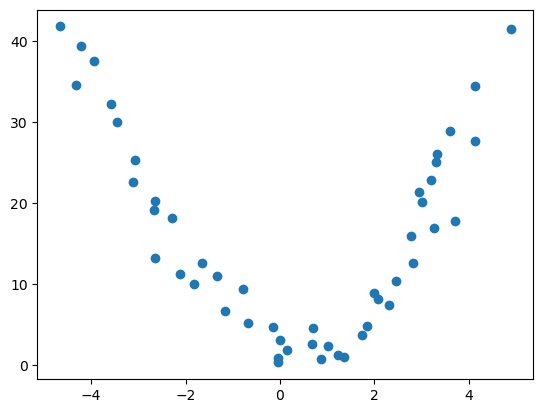

In [128]:
plt.scatter(df1['Temperature (°C)'],df1['Ice Cream Sales (units)'])

In [129]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [130]:
x=df1[['Temperature (°C)']]
y=df1[['Ice Cream Sales (units)']]
poly_model=make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model1=make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
poly_model2=make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
poly_model3=make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
poly_model4=make_pipeline(PolynomialFeatures(degree=7), LinearRegression())
poly_model.fit(x,y)
poly_model1.fit(x,y)
poly_model2.fit(x,y)
poly_model3.fit(x,y)
poly_model4.fit(x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

In [131]:
y_pred=poly_model.predict(x)

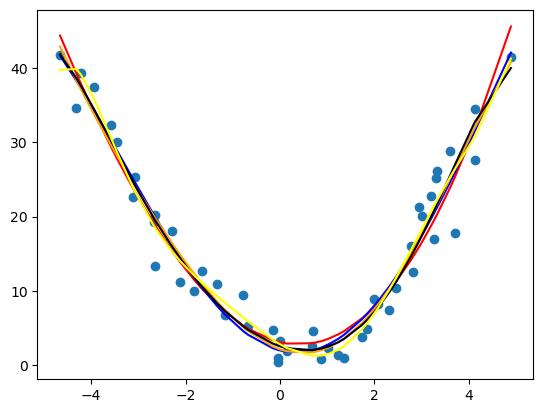

In [132]:
plt.scatter(df1['Temperature (°C)'],df1['Ice Cream Sales (units)'])
plt.plot(x,y_pred,color='red')
plt.plot(x,poly_model1.predict(x),color='blue')
plt.plot(x,poly_model2.predict(x),color='orange')
plt.plot(x,poly_model3.predict(x),color='black')
plt.plot(x,poly_model4.predict(x),color='yellow')

In [133]:
r2_score(y,poly_model.predict(x))

0.9367011897445384

In [134]:
r2_score(y,poly_model1.predict(x))

0.9438453407370606

In [135]:
r2_score(y,poly_model2.predict(x))

0.945283262189464

In [136]:
r2_score(y,poly_model3.predict(x))

0.9463965266611903

In [137]:
r2_score(y,poly_model4.predict(x))

0.9521875881535858

In [138]:
mean_squared_error(y,poly_model1.predict(x))

8.274534314947285

In [139]:
mean_squared_error(y,poly_model2.predict(x))

8.06265286902133

In [140]:
mean_squared_error(y,poly_model3.predict(x))

7.898610469088358

In [141]:
mean_squared_error(y,poly_model4.predict(x))

7.045282576661431

In [142]:
#h/w - convert this ridge and lasso application into streamlit application and deploy it in streamlit cloud, connect with data base mongo db as well
# same you have to perform for polynomial regression as well

In [143]:
import pickle
with open("diabetes_ridge&lasso_final_model.pkl" , 'wb') as file :
    pickle.dump((ridge_model,lasso_model,scaler),file)